In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [30]:
# 1. Load and prepare the data
rail_data = pd.read_csv('/Users/vasantsaladi/Documents/GitHub/nj_transit_data_ru_hack/data/Combined/merged_rail_data.csv')


In [32]:

# Create seasonal features from month
month_map = {
    'JANUARY': 1, 'FEBRUARY': 2, 'MARCH': 3, 'APRIL': 4,
    'MAY': 5, 'JUNE': 6, 'JULY': 7, 'AUGUST': 8,
    'SEPTEMBER': 9, 'OCTOBER': 10, 'NOVEMBER': 11, 'DECEMBER': 12
}

In [33]:
# Convert month to numeric and add cyclical features
df['MONTH_NUM'] = df['MONTH'].map(month_map)
df['MONTH_SIN'] = np.sin(2 * np.pi * df['MONTH_NUM']/12)
df['MONTH_COS'] = np.cos(2 * np.pi * df['MONTH_NUM']/12)


In [34]:
# Prepare features
X = df[['YEAR', 'MONTH_SIN', 'MONTH_COS', 'TRIPS', 'PERCENTAGE', 'MDBF']]
y = df['CANCELATIONS']

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

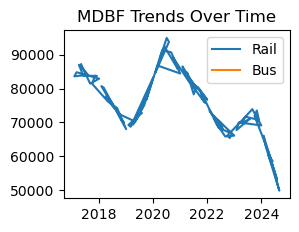

In [35]:
# Plot 1: MDBF Trends Over Time
plt.subplot(2, 2, 1)
plt.plot(rail_data['YEAR'] + rail_data['MONTH_NUM']/12, rail_data['MDBF'], label='Rail')
plt.plot(bus_data['YEAR'] + bus_data['MONTH_NUM']/12, bus_data['MDBF'], label='Bus')
plt.title('MDBF Trends Over Time')
plt.legend()

Text(0.5, 1.0, 'Rail MDBF by Season')

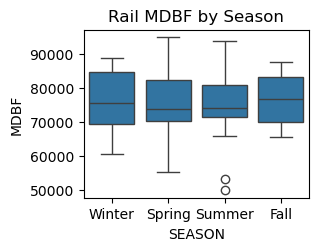

In [36]:
# Plot 2: Seasonal Patterns
plt.subplot(2, 2, 2)
sns.boxplot(data=rail_data, x='SEASON', y='MDBF')
plt.title('Rail MDBF by Season')

Index(['YEAR', 'MONTH', 'CANCEL_TOTAL', 'COUNT', 'TOTAL', 'PERCENTAGE', 'MDBF',
       'MONTH_NUM', 'SEASON', 'MONTH_SIN', 'MONTH_COS'],
      dtype='object')


Text(0.5, 1.0, 'Rail Correlations')

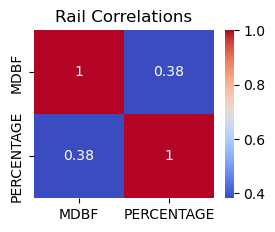

In [41]:
# Print available columns
print(rail_data.columns)

# Modified correlation plot using available columns
plt.subplot(2, 2, 3)
rail_corr = rail_data[['MDBF', 'PERCENTAGE']].corr()  # Using only confirmed columns
sns.heatmap(rail_corr, annot=True, cmap='coolwarm')
plt.title('Rail Correlations')

In [42]:

def prepare_model_data(df, target='MDBF'):
    X = df[['YEAR', 'MONTH_SIN', 'MONTH_COS', 'PERCENTAGE']]  # Removed 'TRIPS'
    y = df[target]
    return X, y

In [46]:
def prepare_model_data(df, target='MDBF'):
    # Use only YEAR and seasonal features
    X = df[['YEAR', 'MONTH_SIN', 'MONTH_COS']]
    y = df[target]
    return X, y

In [47]:
X_rail, y_rail = prepare_model_data(rail_data)
X_bus, y_bus = prepare_model_data(bus_data)

In [48]:
X_train_rail, X_test_rail, y_train_rail, y_test_rail = train_test_split(
    X_rail, y_rail, test_size=0.2, random_state=42
)


In [51]:
# Initialize and train the model
rf_model_rail = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_rail.fit(X_train_rail, y_train_rail)

RandomForestRegressor(random_state=42)

In [52]:
# Make predictions and evaluate model performance
y_pred_rail = rf_model_rail.predict(X_test_rail)
mse = mean_squared_error(y_test_rail, y_pred_rail)
r2 = r2_score(y_test_rail, y_pred_rail)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')





Mean Squared Error: 12499734.81
R² Score: 0.84


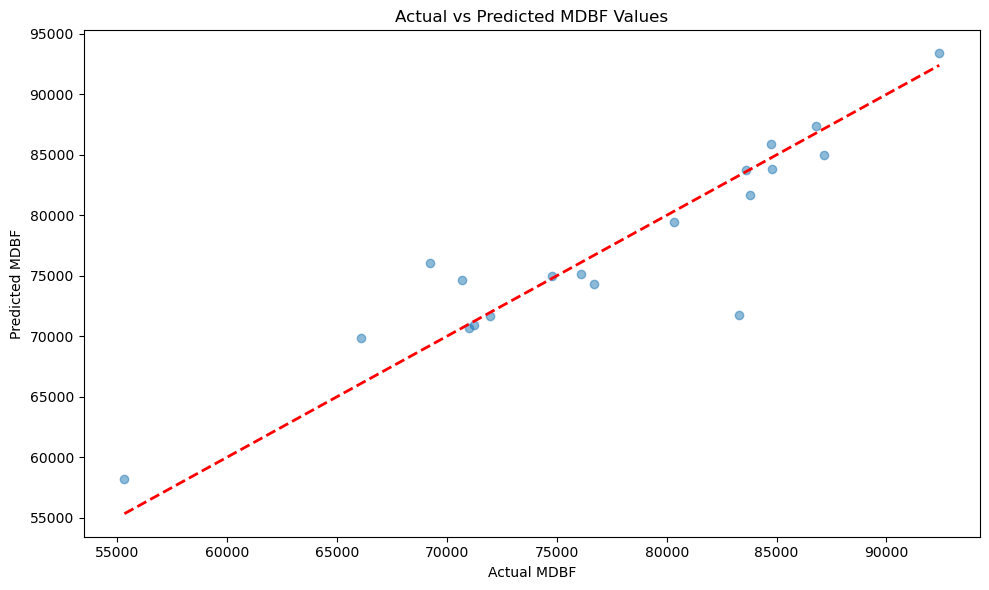

In [53]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_rail, y_pred_rail, alpha=0.5)
plt.plot([y_test_rail.min(), y_test_rail.max()], [y_test_rail.min(), y_test_rail.max()], 'r--', lw=2)
plt.xlabel('Actual MDBF')
plt.ylabel('Predicted MDBF')
plt.title('Actual vs Predicted MDBF Values')
plt.tight_layout()

In [54]:
# Feature importance plot
feature_importance = pd.DataFrame({
    'feature': X_train_rail.columns,
    'importance': rf_model_rail.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)


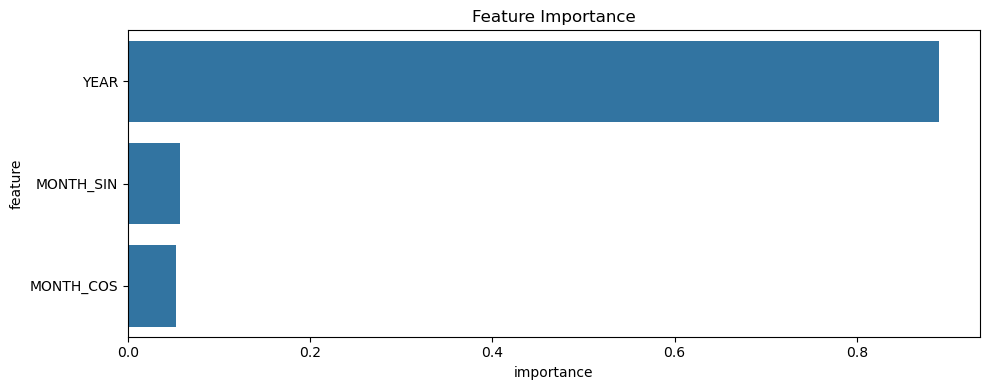

In [55]:

plt.figure(figsize=(10, 4))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()